In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import yfinance as yf
from datetime import date
stk_dataset=yf.download("RELIANCE.NS",start=date(2022,4,1),end=date(2023,4,1))
stk_dataset

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2022-04-01,1217.555908,1221.819472,1202.037676,1208.455819,7922880
2022-04-04,1221.154785,1226.335209,1211.046161,1217.372631,7929162
2022-04-05,1203.894287,1223.997062,1201.441647,1215.378261,13149870
2022-04-06,1200.685303,1207.768203,1186.038093,1186.038093,12257215
2022-04-07,1179.505249,1194.702623,1176.823302,1189.705547,15496499
...,...,...,...,...,...
2023-03-24,1013.383179,1034.862342,1010.945529,1032.677618,12375945
2023-03-27,1029.135986,1036.701982,1011.957353,1019.914294,14054323


In [4]:
stk_dataset.describe()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,1155.587545,1168.252033,1144.331779,1156.517313,1.421068e+07
std,60.387466,60.945747,59.061197,59.403201,8.048908e+06
min,1012.440308,1021.064175,1002.666595,1018.764485,3.370033e+06
25%,1109.638306,1118.463372,1098.034880,1110.591229,9.434053e+06
50%,1163.688843,1177.236417,1151.686831,1164.445246,1.257582e+07
75%,1198.876465,1209.051795,1184.848440,1196.990743,1.706322e+07
max,1292.740601,1309.382176,1277.268085,1309.382176,8.199715e+07


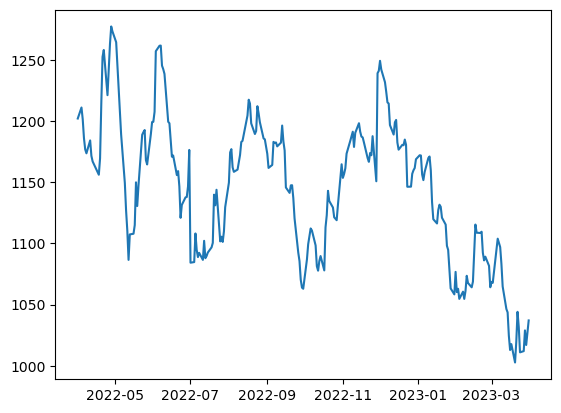

In [5]:
plt.plot(stk_dataset["Low"])

In [6]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(stk_dataset["Low"])

P_value < 0.0.5 reject null and accept alternate hypothesis     H0: Datas are non-stationary
P_value > 0.0.5 accept null and reject alternate hypothesis     H1 : Datas are stationary

In [11]:
Statistic=result[0]
p_value=result[1]
critical_values=result[4]
print("p-value<=0.05-->Accept Alternate Hypothesis")
print("p-value>0.05-->Accept Null Hypothesis")
if Statistic < critical_values["1%"] or Statistic < critical_values["5%"] or Statistic < critical_values["10%"] or p_value < 0.05:
    print(" Rejecting null and accepting alternate the data are stationary")
else:
    print(" accepting null and rejecting alternate the data are non-stationary")
 
 

p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
 accepting null and rejecting alternate the data are non-stationary


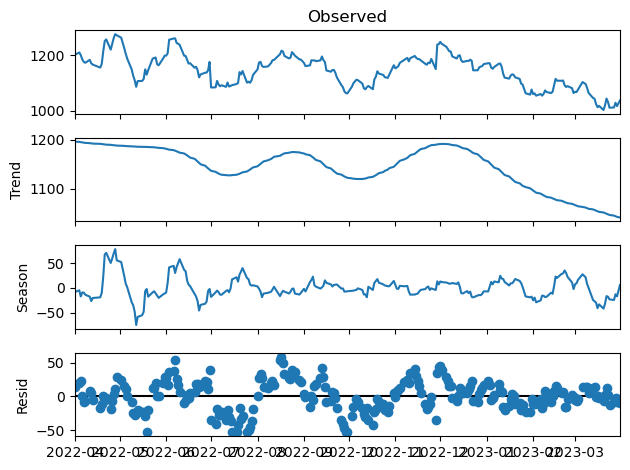

In [13]:
from statsmodels.tsa.seasonal import STL

decomposition = STL(stk_dataset["Low"], period=30).fit()  # Set `period` based on known seasonality
decomposition.plot()
plt.show()

# It is Season and non-stationarity